In [1]:
import os
import matplotlib.pyplot as plt
import pywt
import numpy as np
%matplotlib inline

In [2]:
SMALL_SIZE = 17
MEDIUM_SIZE = 18
BIGGER_SIZE = 19

plt.rcParams.update({
                "font.family": "serif",
                "text.usetex": True,
                "pgf.rcfonts": False,
                "pgf.texsystem": 'pdflatex',  # default is xetex
            })

plt.rc('font', size=MEDIUM_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize

In [3]:
nscenarios = 3

In [4]:
undecimated=""
radiotelescope="jvla"

In [5]:
scenario_1_means = np.load(undecimated+"wavelet_"+radiotelescope+"_scenario_1_means.npy")
scenario_1_stds = np.load(undecimated+"wavelet_"+radiotelescope+"_scenario_1_stds.npy")

scenario_2_means = np.load(undecimated+"wavelet_"+radiotelescope+"_scenario_2_means.npy")
scenario_2_stds = np.load(undecimated+"wavelet_"+radiotelescope+"_scenario_2_stds.npy")

scenario_3_means = np.load(undecimated+"wavelet_"+radiotelescope+"_scenario_3_means.npy")
scenario_3_stds = np.load(undecimated+"wavelet_"+radiotelescope+"_scenario_3_stds.npy")

In [8]:
family_per_scenario=["coif","coif","coif"]

In [9]:
wavelist_per_scenario = [pywt.wavelist(i, kind="discrete") for i in family_per_scenario]

In [10]:
# Getting minimum AICs
idx_sc1 = np.argmin(scenario_1_means[2])
idx_sc2 = np.argmin(scenario_2_means[2])
idx_sc3 = np.argmin(scenario_3_means[2])

In [16]:
print("Scenario 1: Best AIC Wavelet: "+wavelist_per_scenario[0][idx_sc1]+" "+str(scenario_1_means[2, idx_sc1])+"+-"+str(scenario_1_stds[2, idx_sc1]))
print("Scenario 2: Best AIC Wavelet: "+wavelist_per_scenario[1][idx_sc1]+" "+str(scenario_2_means[2, idx_sc2])+"+-"+str(scenario_2_stds[2, idx_sc2]))
print("Scenario 3: Best AIC Wavelet: "+wavelist_per_scenario[2][idx_sc1]+" "+str(scenario_3_means[2, idx_sc3])+"+-"+str(scenario_3_stds[2, idx_sc3]))

Scenario 1: Best AIC Wavelet family {0} : {1:.3f} 
Scenario 1: Best AIC Wavelet: coif3 -22703.863+-116.23359
Scenario 2: Best AIC Wavelet: coif3 -22647.234+-113.42274
Scenario 3: Best AIC Wavelet: coif3 -22385.555+-84.31499


In [17]:
print("Scenario 1: Best AIC Wavelet: "+wavelist_per_scenario[0][idx_sc1]+" "+str(scenario_1_means[3, idx_sc1])+"+-"+str(scenario_1_stds[3, idx_sc1]))
print("Scenario 2: Best AIC Wavelet: "+wavelist_per_scenario[1][idx_sc1]+" "+str(scenario_2_means[3, idx_sc2])+"+-"+str(scenario_2_stds[3, idx_sc2]))
print("Scenario 3: Best AIC Wavelet: "+wavelist_per_scenario[2][idx_sc1]+" "+str(scenario_3_means[3, idx_sc3])+"+-"+str(scenario_3_stds[3, idx_sc3]))

Scenario 1: Best AIC Wavelet: coif3 -22344.734+-132.99687
Scenario 2: Best AIC Wavelet: coif3 -22356.95+-132.96606
Scenario 3: Best AIC Wavelet: coif3 -21943.828+-118.3429


In [18]:
print("Scenario 1: Best AIC Wavelet: "+wavelist_per_scenario[0][idx_sc1]+" "+str(scenario_1_means[0, idx_sc1])+"+-"+str(scenario_1_stds[0, idx_sc1]))
print("Scenario 2: Best AIC Wavelet: "+wavelist_per_scenario[1][idx_sc1]+" "+str(scenario_2_means[0, idx_sc2])+"+-"+str(scenario_2_stds[0, idx_sc2]))
print("Scenario 3: Best AIC Wavelet: "+wavelist_per_scenario[2][idx_sc1]+" "+str(scenario_3_means[0, idx_sc3])+"+-"+str(scenario_3_stds[0, idx_sc3]))

Scenario 1: Best AIC Wavelet: coif3 108.389984+-10.565841
Scenario 2: Best AIC Wavelet: coif3 95.07451+-4.6249433
Scenario 3: Best AIC Wavelet: coif3 103.57941+-7.9270706


In [19]:
print("Scenario 1: Best AIC Wavelet: "+wavelist_per_scenario[0][idx_sc1]+" "+str(scenario_1_means[1, idx_sc1])+"+-"+str(scenario_1_stds[1, idx_sc1]))
print("Scenario 2: Best AIC Wavelet: "+wavelist_per_scenario[1][idx_sc1]+" "+str(scenario_2_means[1, idx_sc2])+"+-"+str(scenario_2_stds[1, idx_sc2]))
print("Scenario 3: Best AIC Wavelet: "+wavelist_per_scenario[2][idx_sc1]+" "+str(scenario_3_means[1, idx_sc3])+"+-"+str(scenario_3_stds[1, idx_sc3]))

Scenario 1: Best AIC Wavelet: coif3 0.00079588825+-2.8539494e-05
Scenario 2: Best AIC Wavelet: coif3 0.0008165414+-2.7943068e-05
Scenario 3: Best AIC Wavelet: coif3 0.0008705169+-2.4603525e-05


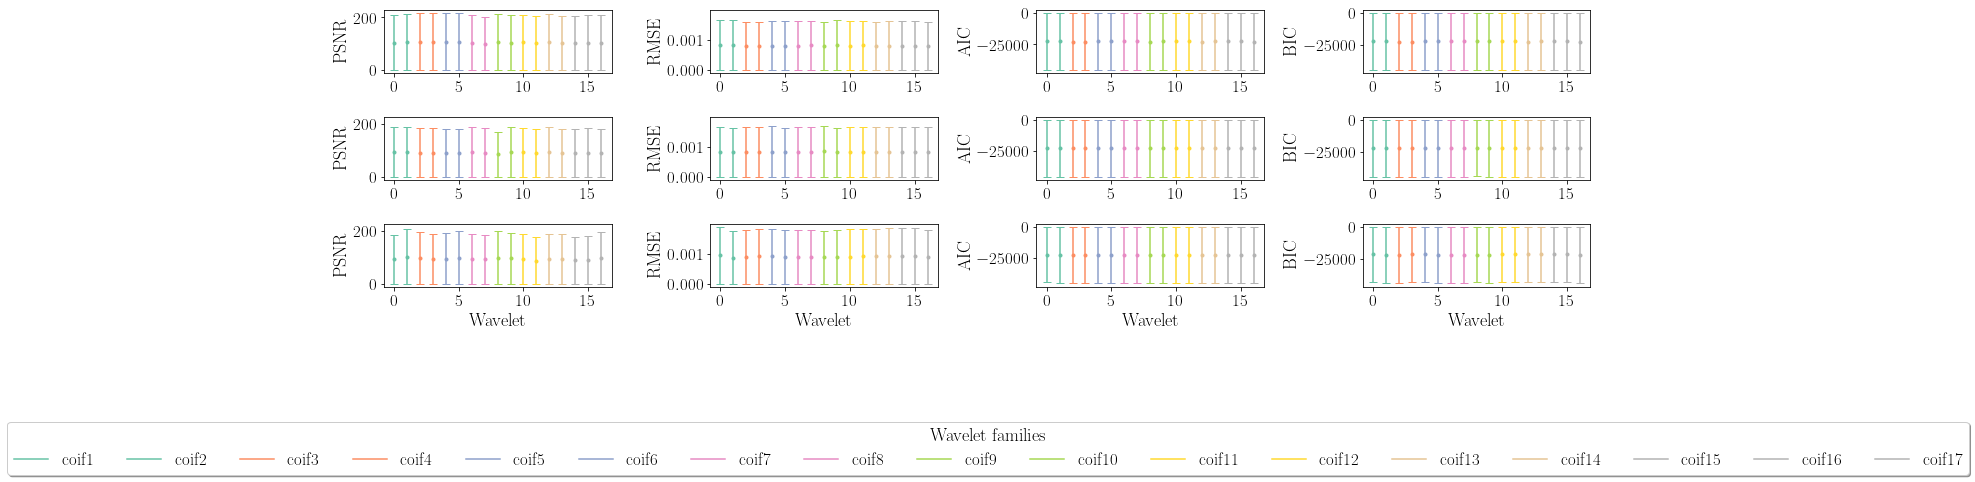

In [22]:
names = ["PSNR", "RMSE", "AIC", "BIC"]  
fig, ax = plt.subplots(nrows=3, ncols=len(names), sharey='col', sharex='row', figsize=(18, 5))
#cmap = plt.get_cmap('tab20')
cmap = plt.get_cmap('Set2')


for i in range(3):
    wavelets = wavelist_per_scenario[i]
    nwavelets = len(wavelets)
    id_wav = np.arange(0, nwavelets)
    colors = [cmap(i) for i in np.linspace(0, 1, nwavelets)]
    for j in range(len(names)):
        for k in range(nwavelets):
            if i==0:
                ax[i,j].plot(id_wav[k], scenario_1_means[j,k], label=wavelets[k], color=colors[k])
                ax[i,j].errorbar(id_wav[k], scenario_1_means[j,k], yerr = scenario_1_means[j,k], fmt ='.', capsize=4, color=colors[k])
            elif i==1:
                ax[i,j].plot(id_wav[k], scenario_2_means[j,k], label=wavelets[k], color=colors[k])
                ax[i,j].errorbar(id_wav[k], scenario_2_means[j,k], yerr = scenario_2_means[j,k], fmt ='.', capsize=4, color=colors[k])
            else:
                ax[i,j].plot(id_wav[k], scenario_3_means[j,k], label=wavelets[k], color=colors[k])
                ax[i,j].errorbar(id_wav[k], scenario_3_means[j,k], yerr = scenario_3_means[j,k], fmt ='.', capsize=4, color=colors[k])
                ax[i,j].set_xlabel("Wavelet")
            ax[i,j].set_ylabel(names[j])

#for i in range(3):
#    for j in range(len(names)):
#        for k in range(scenarios_means.shape[2]):
#            ax[i,j].plot(_id[k], scenarios_means[i,j,k], label=use_wavelet[k], color=colors[k])
#            ax[i,j].errorbar(_id[k], scenarios_means[i,j,k], yerr = scenarios_stds[i,j,k], fmt ='.', capsize=4, color=colors[k])
#            #if names[f] == "PSNR" and sc==3:
#            #ax[sc-1,f].legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=19, fancybox=True, shadow=True, title="Wavelets")
#            ax[i,j].set_ylabel(names[j])
#        if i==2:
#            ax[i,j].set_xlabel("Wavelet")

#for k in range(len(idx_coif)):
#    for i in range(scenarios_means.shape[0]):
#        for j in range(len(names)):
#            ax[i,j].axvline(x = idx_coif[k], color = 'k', linestyle="--", alpha=0.8)
            
#for i in range(scenarios_means.shape[0]):
    #ax[i,1].set_ylim([0,0.0015])
    #ax[i,2].set_ylim([-25000,-20000])
    #ax[i,3].set_ylim([-25000,-20000])

    #ax[i,2].set_ylim([-25000,-15000]) #undecimated
    #ax[i,3].set_ylim([-25000,17500]) #undecimated

ofile_name = "family_"+undecimated+"wavelets_"+radiotelescope+".pdf"
#fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=19, fancybox=True, shadow=True, title="Wavelets")
#ax[len(scenarios)-1, 1].legend(loc='upper left', bbox_to_anchor=[1.0, -0.5], ncol=19, fancybox=True, shadow=True, title="Wavelets")
h, l = ax[0,0].get_legend_handles_labels()
legend = fig.legend(h, l, loc='lower center', ncol=18, fancybox=True, bbox_to_anchor=[0.52, -0.375], shadow=True, title="Wavelet families")
# fig.suptitle("Delta dirac basis + Undecimated Wavelet")
fig.tight_layout()
if os.path.isfile(ofile_name):
    os.remove(ofile_name)   # Opt.: os.system("rm "+strFile)
fig.savefig(ofile_name, dpi=100, bbox_inches='tight')#